In [2]:
from wick import wick as wick_class
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm_notebook as tqdm
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


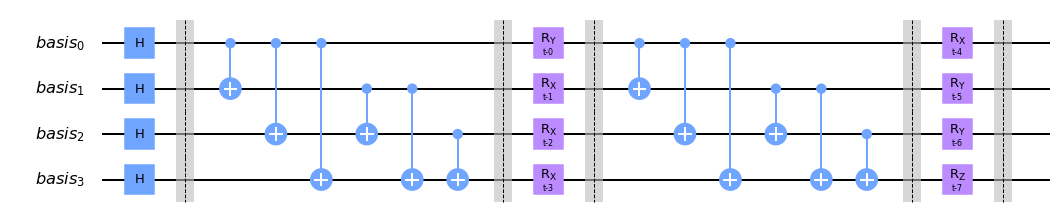

In [2]:
wick=wick_class(4,seed=3,depth=2)
wick.circuit.draw('mpl')

In [50]:
n=5
wick=wick_class(n,seed=3,depth=3)
wick.get_initial_angles()

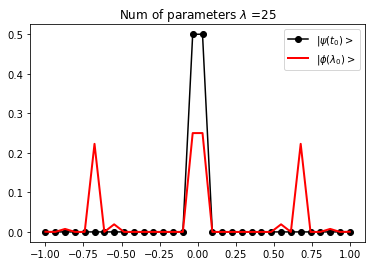

In [11]:
state=wick.get_final_state(wick.angles[0])

x=np.linspace(-1,1,2**n)
fig,ax=plt.subplots()
ax.plot(x,wick.initial*wick.initial.conj(),c="k",label="$|\psi(t_0)>$",marker="o")
ax.plot(x,state*state.conj(),c="r",label="$|\phi(\lambda_0)>$",lw=2)
ax.set_title(f"Num of parameters $\lambda$ ={wick.num_parameters}")
ax.legend()
plt.show()

In [18]:
n=5
closeness=[]
for depth in tqdm([1,2,3,4,5,6,7,8]):
    wick=wick_class(n,seed=5,depth=depth)
    wick.get_initial_angles(maxiter=2000)
    closeness.append(wick.initial_closeness)

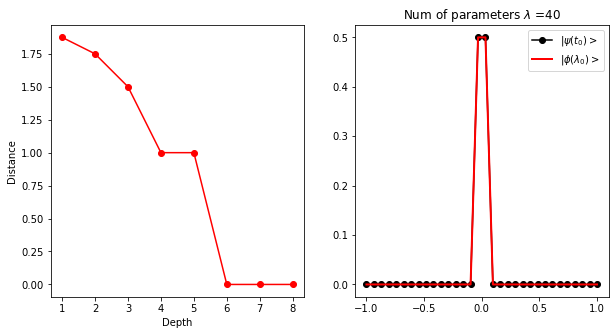

In [23]:
fig,ax1=plt.subplots(1,2,figsize=(10,5))
ax=ax1[0]
depth=[1,2,3,4,5,6,7,8]
ax.plot(depth,closeness,c="r",marker="o")
ax.set_ylabel("Distance")
ax.set_xlabel("Depth")

ax=ax1[1]
state=wick.get_final_state(wick.angles[0])

x=np.linspace(-1,1,2**n)
ax.plot(x,wick.initial*wick.initial.conj(),c="k",label="$|\psi(t_0)>$",marker="o")
ax.plot(x,state*state.conj(),c="r",label="$|\phi(\lambda_0)>$",lw=2)
ax.set_title(f"Num of parameters $\lambda$ ={wick.num_parameters}")
ax.legend()
plt.show()

# Calculating $A_{ij}$
Here we calculate $A_{ij}$ for a given set of $\theta_i$s

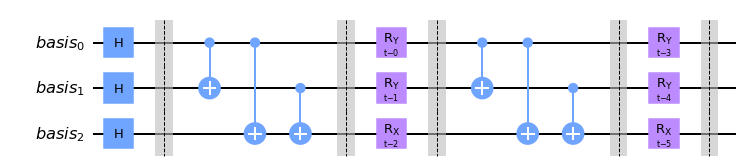

In [9]:
wick=wick_class(3,seed=4,depth=2,verbose=False)
wick.main_circuit.draw('mpl')

$ A_{ij}$ circuit for i=0 j =2

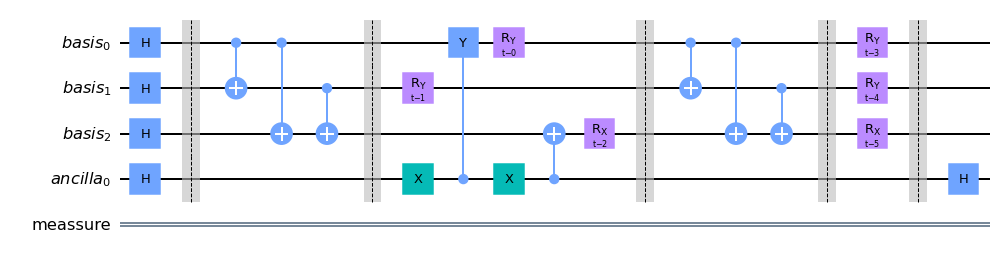

In [7]:
wick.circuit_aij[0][2].draw('mpl')

In [13]:
angles=np.random.uniform(0,np.pi,wick.num_parameters)
A=np.zeros((wick.num_parameters,wick.num_parameters))
for i in range(wick.num_parameters):
    for j in range(wick.num_parameters):
        state,p=wick.get_final_state_lm(angles,[j,i])
        A[i,j]=2*p['0']-1

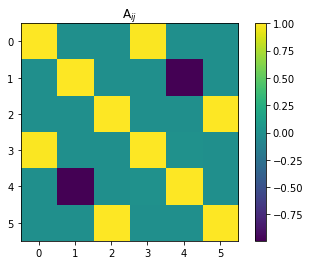

Determinant of A =  0.0


In [19]:
plt.imshow(A)
plt.title("A$_{ij}$")
plt.colorbar()
plt.show()
print("Determinant of A = " ,np.linalg.det(A))

# Calculating C$_{ik}$ for various angle parameters $\theta_i$ and hamiltonain term $k$

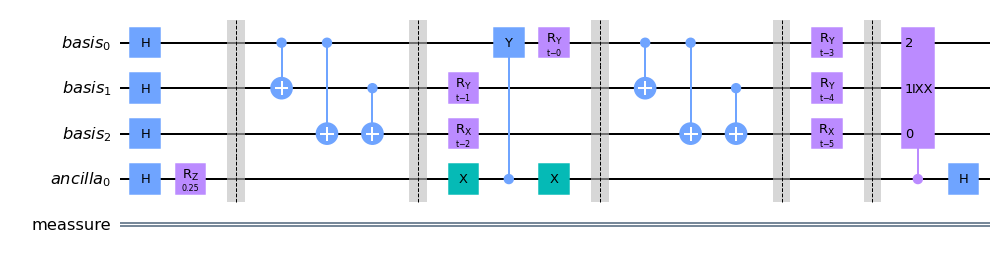

In [37]:
wick.circuit_cik[0][1].draw('mpl')

In [15]:
C=np.zeros((wick.num_parameters,wick.num_ham_terms))
for i in range(wick.num_parameters):
    for j in range(wick.num_ham_terms):
        state,p=wick.get_final_state_ik(angles,[i,j])
        C[i,j]=2*p['0']-1

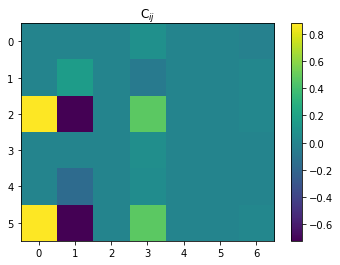

In [18]:
plt.imshow(C)
plt.colorbar()
plt.title("C$_{ij}$")
plt.show()

Solving 
\begin{equation}
A(t)\times \dot{\theta}=C(t)\\
\dot{\theta}=A^{-1}(t)C(t)
\end{equation}

In [36]:
theta_dot, residuals, rank, s=np.linalg.lstsq(A,C.sum(axis=1))
print("theta_dot=",theta_dot)

theta_dot= [-0.2041727   0.27518504  0.32444448  0.27027486  0.15833369  0.32444448]
